In [3]:
import pandas as pd

In [6]:
newdata=pd.read_csv('data.csv')
newdata

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,2,Mrs,0
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,2,Mrs,0
2,2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,2,Mrs,0
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,2,Mrs,4
4,4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,2,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0,Mrs,1
887,887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0,Mrs,0
888,888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,2,Miss,0
889,889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,2,Mrs,0


In [13]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    int64  
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    object 
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 97.6+ KB


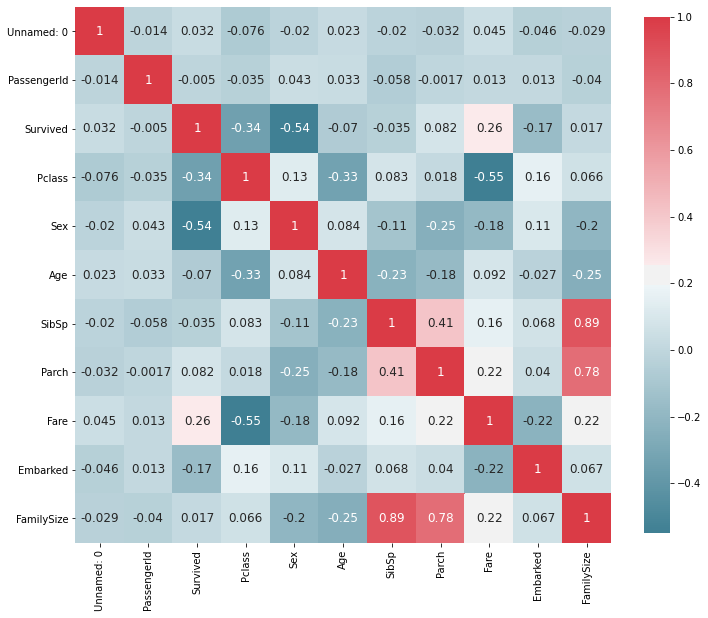

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220, 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .95 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(newdata)

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
newdata['Title']=encoder.fit_transform(newdata['Title'])
newdata

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,2,2,0
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,2,2,0
2,2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,2,2,0
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,2,2,4
4,4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0,2,1
887,887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0,2,0
888,888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,2,1,0
889,889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,2,2,0


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


x=newdata[["Pclass", "Sex", "Age", "Fare","Embarked","FamilySize","Title","FamilySize"]]
y=newdata["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40) 

logreg = LogisticRegression(max_iter=100)   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


In [62]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actual'],colnames=['predicted'])
print (confusion_matrix)

predicted    0   1
actual            
0          139  23
1           23  83


In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.880


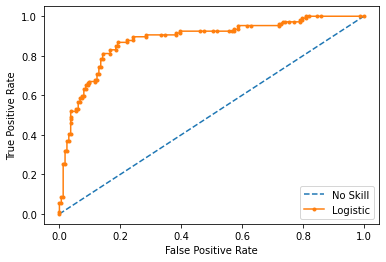

In [78]:
lr_probs = logreg.predict_proba(x_test)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()